In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import OneHotEncoder

In [3]:
X, y = fetch_openml('mnist_784', return_X_y=True)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [5]:
X_train = X_train/255.0
X_test = X_test/255.0

In [5]:
print (f'X_train\'s min: {X_train.min()}')
print (f'X_train\'s max: {X_train.max()}')
print (f'X_test\'s min: {X_test.min()}')
print (f'X_test\'s min: {X_test.max()}')

X_train's min: 0.0
X_train's max: 1.0
X_test's min: 0.0
X_test's min: 1.0


Text(0, 0.5, 'Loss')

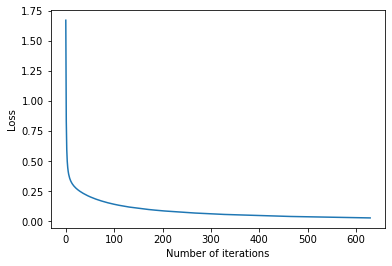

In [11]:
nn_clf = MLPClassifier(hidden_layer_sizes=(64),
                    activation='relu',
                    solver='sgd',
                    alpha=0,
                    learning_rate_init=1e-3,
                    max_iter=1000,
                    n_iter_no_change=25,
                    random_state=1)
nn_clf.fit(X_train, y_train.flatten())

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(nn_clf.loss_curve_)
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Loss')

In [12]:
print('Training accuracy: ', round(nn_clf.score(X_train, y_train),5))
print('Testing accuracy: ', round(nn_clf.score(X_test, y_test),5))

Training accuracy:  0.9943
Testing accuracy:  0.97394


Text(0, 0.5, 'Loss')

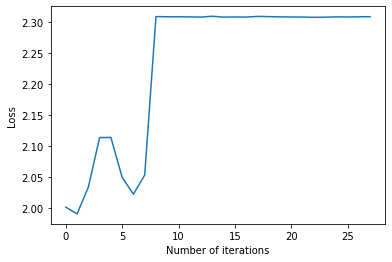

In [13]:
nn_LE = MLPClassifier(hidden_layer_sizes=(64),
                    activation='relu',
                    solver='sgd',
                    alpha=0,
                    learning_rate_init=1,
                    max_iter=1000,
                    n_iter_no_change=25,
                    random_state=1)
nn_LE.fit(X_train, y_train.flatten())

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(nn_LE.loss_curve_)
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Loss')

In [14]:
print('Training accuracy: ', round(nn_LE.score(X_train, y_train),5))
print('Testing accuracy: ', round(nn_LE.score(X_test, y_test),5))

Training accuracy:  0.09728
Testing accuracy:  0.09811


Text(0, 0.5, 'Loss')

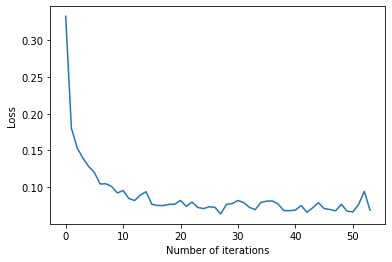

In [20]:
nn_LE4 = MLPClassifier(hidden_layer_sizes=(64),
                    activation='relu',
                    solver='sgd',
                    alpha=0,
                    learning_rate_init=0.5,
                    max_iter=1000,
                    n_iter_no_change=25,
                    random_state=1)

nn_LE4.fit(X_train, y_train.flatten())

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(nn_LE4.loss_curve_)
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Loss')

Text(0, 0.5, 'Loss')

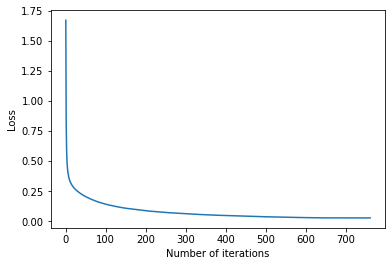

In [24]:
nn_LE6 = MLPClassifier(hidden_layer_sizes=(64),
                    activation='relu',
                    solver='sgd',
                    alpha=0,
                    learning_rate_init=1e-3,
                    max_iter=1000,
                    n_iter_no_change=25,
                    random_state=1,
                    learning_rate = 'adaptive')
nn_LE6.fit(X_train, y_train.flatten())

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(nn_LE6.loss_curve_)
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Loss')

Text(0, 0.5, 'Loss')

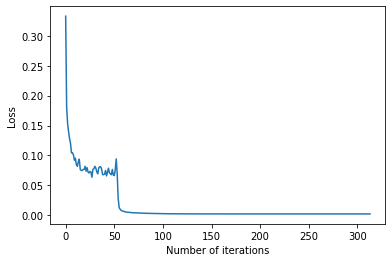

In [22]:
nn_LE5 = MLPClassifier(hidden_layer_sizes=(64),
                    activation='relu',
                    solver='sgd',
                    alpha=0,
                    learning_rate_init=0.5,
                    max_iter=1000,
                    n_iter_no_change=25,
                    random_state=1,
                    learning_rate = 'adaptive')

nn_LE5.fit(X_train, y_train.flatten())
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(nn_LE5.loss_curve_)
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Loss')

In [16]:
print('Training accuracy: ', round(nn_LE2.score(X_train, y_train),5))
print('Testing accuracy: ', round(nn_LE2.score(X_test, y_test),5))

Training accuracy:  1.0
Testing accuracy:  0.97749


Text(0, 0.5, 'Loss')

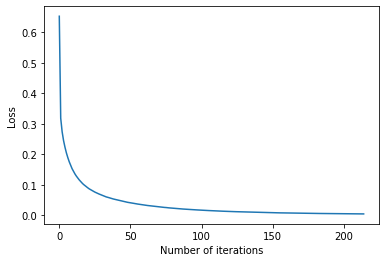

In [17]:
nn_LE3 = MLPClassifier(hidden_layer_sizes=(64),
                    activation='relu',
                    solver='sgd',
                    alpha=0,
                    learning_rate_init=0.01,
                    max_iter=1000,
                    n_iter_no_change=25,
                    random_state=1)
nn_LE3.fit(X_train, y_train.flatten())

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(nn_LE3.loss_curve_)
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Loss')

In [18]:
print('Training accuracy: ', round(nn_LE3.score(X_train, y_train),5))
print('Testing accuracy: ', round(nn_LE3.score(X_test, y_test),5))

Training accuracy:  0.99992
Testing accuracy:  0.97446


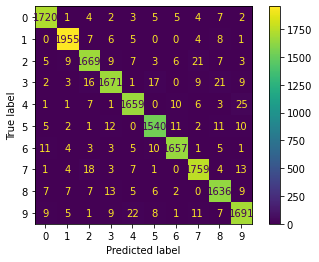

In [8]:
plot_confusion_matrix(nn_clf, X_test, y_test)
plt.show()

In [44]:
parameters = {'hidden_layer_sizes':[(64,), (100,), (150,)]}

nn2 = MLPClassifier(
                    activation='relu',
                    solver='sgd',
                    max_iter=1000,
                    alpha=0,
                    learning_rate_init=1e-3,
                    n_iter_no_change=25,
                    random_state=1)

clf2 = GridSearchCV(nn2, parameters, scoring='accuracy', cv=3, verbose=2, n_jobs=-1)

clf2.fit(X_train, y_train.flatten())
clf2.best_params_

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:   58.0s remaining:   16.6s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  1.2min finished
/home/pt18419/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


{'hidden_layer_sizes': (150,)}

In [7]:
print('Training accuracy: ', round(clf2.score(X_train, y_train),5))
print('Testing accuracy: ', round(clf2.score(X_test, y_test),5))

Training accuracy:  0.99535
Testing accuracy:  0.97697


In [10]:
parameters = {'learning_rate_init':[0.01, 0.001, 0.0001, 0.005, 0.0005]}

nn5 = MLPClassifier(hidden_layer_sizes=(150,),
                    activation='relu',
                    solver='sgd',
                    max_iter=1000,
                    alpha=0,
                    n_iter_no_change=25,
                    random_state=1)

clf5 = GridSearchCV(nn5, parameters, scoring='accuracy', cv=3, verbose=2, n_jobs=-1)

clf5.fit(X_train, y_train.flatten())
clf5.best_params_

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 77.2min finished


{'learning_rate_init': 0.01}

In [22]:
print('Training accuracy: ', round(clf5.score(X_train, y_train),5))
print('Testing accuracy: ', round(clf5.score(X_test, y_test),5))

Training accuracy:  1.0
Testing accuracy:  0.97949


In [6]:
nn3 = MLPClassifier(hidden_layer_sizes=(150,),
                    activation='relu',
                    solver='sgd',
                    alpha=0,
                    learning_rate_init=0.01,
                    max_iter=1000,
                    n_iter_no_change=25,
                    random_state=1)

nn3.fit(X_train, y_train.flatten())

MLPClassifier(alpha=0, hidden_layer_sizes=(150,), learning_rate_init=0.01,
              max_iter=1000, n_iter_no_change=25, random_state=1, solver='sgd')

In [7]:
print('Training accuracy: ', round(nn3.score(X_train, y_train),5))
print('Testing accuracy: ', round(nn3.score(X_test, y_test),5))

Training accuracy:  0.99998
Testing accuracy:  0.9756


In [14]:
start_time = dt.datetime.now()
predictions = nn3.predict(X_test)
elapsed_time = dt.datetime.now() - start_time
print('Prediction takes {}'.format(str(elapsed_time)))

Prediction takes 0:00:00.130956


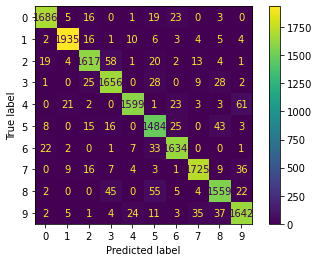

In [34]:
plot_confusion_matrix(nn_clf, X_test, y_test)
plt.show()

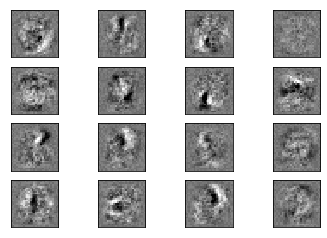

In [89]:
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = nn_clf.coefs_[0].min(), nn_clf.coefs_[0].max()
for coef, ax in zip(nn_clf.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

In [27]:
nn_clf = MLPClassifier(hidden_layer_sizes=(64),
                    activation='relu',
                    solver='sgd',
                    alpha=0.03274549162877728,
                    learning_rate_init=0.01,
                    max_iter=1000,
                    n_iter_no_change=25,
                    random_state=1)


N_TRAIN_SAMPLES = X_train.shape[0]
N_EPOCHS = 50
N_BATCH = 128
N_CLASSES = np.unique(y_train)

scores_train = []
scores_test = []

# EPOCH
epoch = 0
while epoch < N_EPOCHS:
    print('epoch: ', epoch)
    # SHUFFLING
    random_perm = np.random.permutation(X_train.shape[0])
    mini_batch_index = 0
    while True:
        # MINI-BATCH
        indices = random_perm[mini_batch_index:mini_batch_index + N_BATCH]
        nn_clf.partial_fit(X_train[indices], y_train[indices], classes=N_CLASSES)
        mini_batch_index += N_BATCH

        if mini_batch_index >= N_TRAIN_SAMPLES:
            break

    # SCORE TRAIN
    scores_train.append(nn_clf.score(X_train, y_train))

    # SCORE TEST
    scores_test.append(nn_clf.score(X_test, y_test))

    epoch += 1


epoch:  0
epoch:  1
epoch:  2
epoch:  3
epoch:  4
epoch:  5
epoch:  6
epoch:  7
epoch:  8
epoch:  9
epoch:  10
epoch:  11
epoch:  12
epoch:  13
epoch:  14
epoch:  15
epoch:  16
epoch:  17
epoch:  18
epoch:  19
epoch:  20
epoch:  21
epoch:  22
epoch:  23
epoch:  24
epoch:  25
epoch:  26
epoch:  27
epoch:  28
epoch:  29
epoch:  30
epoch:  31
epoch:  32
epoch:  33
epoch:  34
epoch:  35
epoch:  36
epoch:  37
epoch:  38
epoch:  39
epoch:  40
epoch:  41
epoch:  42
epoch:  43
epoch:  44
epoch:  45
epoch:  46
epoch:  47
epoch:  48
epoch:  49


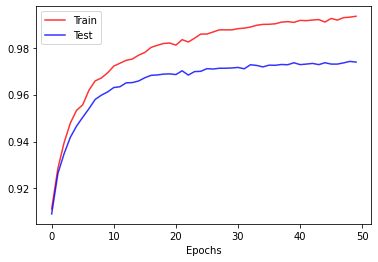

In [28]:
plt.plot(scores_train, color='r', alpha=0.8, label='Train')
plt.plot(scores_test, color='b', alpha=0.8, label='Test')
plt.xlabel('Epochs')
plt.legend(loc='upper left')
plt.show()

In [32]:
print('Training accuracy: ', round(nn_clf.score(X_train, y_train),5))
print('Testing accuracy: ', round(nn_clf.score(X_test, y_test),5))

Training accuracy:  0.99385
Testing accuracy:  0.9744


0.9804952380952381


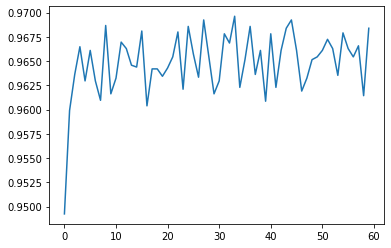

In [5]:
mlp=MLPClassifier(hidden_layer_sizes=(64),
                    activation='relu',
                    solver='adam',
                    alpha=0.03274549162877728,
                    learning_rate_init=0.01,
                    max_iter=1000,
                    n_iter_no_change=25,
                    random_state=1,
                    validation_fraction=0.2, 
                    early_stopping=True)

mlp.fit(X_train,y_train)
print (mlp.score(X_train,y_train))
plt.plot(mlp.validation_scores_)